# Unzipping DataSet

In [ ]:
!unzip /content/sentiment-analysis-on-movie-reviews.zip

In [ ]:
!unzip test.tsv.zip
!unzip train.tsv.zip

# Code

Importing basic data analytics libs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing datasets

In [5]:
test_df = pd.read_csv("test.tsv", sep='\t')
train_df = pd.read_csv("train.tsv", sep='\t')

### Exploration

In [73]:
train_df.info()
print("-----------------------")
train_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
-----------------------


Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [6]:
train_df.shape , test_df.shape

((156060, 4), (66292, 3))

Plotting graphs on the training data

<Axes: xlabel='Sentiment'>

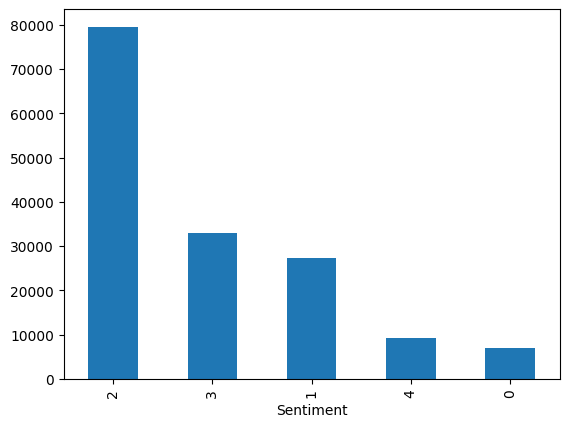

In [38]:
train_df['Sentiment'].value_counts().plot(kind='bar')

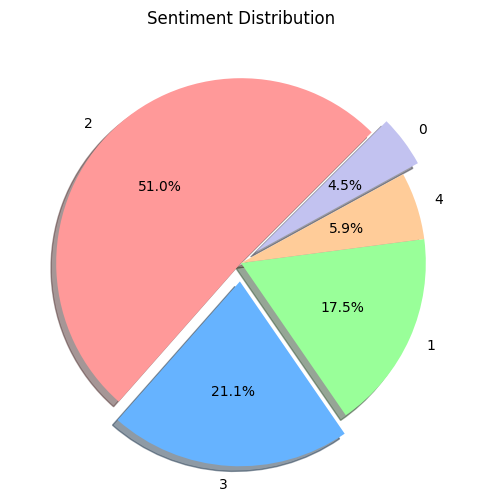

In [39]:
plt.figure(figsize=(10,6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = (0, 0.1, 0, 0, 0.1)

train_df['Sentiment'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    shadow=True,
    colors=colors,
    startangle=45,
    explode=explode
)

plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

### Tokenization & Stemming

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [8]:
stemmer = SnowballStemmer(language = 'english')

In [9]:
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [14]:
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [16]:
selected_stopwords = english_stopwords[:115]

TF-IDF Vectorizer is a method used in natural language processing (NLP) and machine learning to convert textual data into numerical features. It stands for Term Frequency-Inverse Document Frequency, which measures the importance of words in a document relative to a collection of documents.

- Highlights Important Words: It assigns higher weights to words that are frequent in a document but not frequent across the corpus.
- Reduces Noise: Words that occur in every document (like "the", "is") are assigned lower weights.
- Improves Text Representation: Converts raw text into meaningful numerical vectors for use in machine learning algorithms.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt_tab')

vectorizer =  TfidfVectorizer(tokenizer = tokenize ,
                              stop_words = selected_stopwords,
                              ngram_range = (1,2),
                              max_features = 1000
                             )

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [22]:
%%time
vectorizer.fit(train_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 31.1 s, sys: 126 ms, total: 31.3 s
Wall time: 31.6 s


TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7d4f8b1f1c60>)

In [24]:
%%time
train_inputs = vectorizer.transform(train_df.Phrase)

CPU times: user 32.6 s, sys: 83.4 ms, total: 32.7 s
Wall time: 33.1 s


In [25]:
train_inputs.shape

(156060, 1000)

In [28]:
test_df['Phrase'] = test_df['Phrase'].fillna("")

In [29]:
%%time
test_inputs = vectorizer.transform(test_df.Phrase)

CPU times: user 13 s, sys: 37.6 ms, total: 13 s
Wall time: 13.1 s


###Model Training

Splitting dataset into training and validation sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = train_inputs
y = train_df.Sentiment

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape , X_val.shape

((124848, 1000), (31212, 1000))

Using xgboost classifier for classification of the sentiment, since the dataset is multi-class

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [35]:
xgb_model = XGBClassifier(
    n_estimators= 5000,         # Number of trees
    learning_rate=0.1,        # Step size shrinkage
    max_depth= 10,              # Maximum tree depth
    subsample=0.8,            # Fraction of samples per tree
    colsample_bytree=0.9,     # Fraction of features per tree
    gamma= 1,                  # Minimum loss reduction for further splits
    scale_pos_weight=1,       # Adjusts weight for imbalanced classes
    random_state=42           # Seed for reproducibility
)

In [36]:
%%time
# Fitting the model
xgb_model.fit(X_train, y_train)

# Prediction on validation set
y_pred = xgb_model.predict(X_val)

# Evaluating accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.6225169806484685
CPU times: user 1h 34min 4s, sys: 12.5 s, total: 1h 34min 17s
Wall time: 54min 21s


Pickling the files


In [37]:
import pickle
# Save model
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
